# Forecasting Assignment
Forecasting in data science refers to the process of making predictions about future events, values, or trends based on historical data and patterns. It is a critical aspect of data analysis that is used in various fields and industries to support decision-making, planning, and resource allocation. Here are some key concepts and techniques related to forecasting in data science:
### Time Series Method
#### 1. Simple Moving Average
#### 2. Simple Exponential Smothing 
#### 3. ARIMA Model 
#### 4. Holt's Method 
#### 5. Holt's Exponential Method 
##### a) Additional Method b) Multiplicative Method
### Forecasting Method
#### 1.Time Series Analysis
#### 2. Additive Seasonal Decomposition
#### 3. Multiplicative Seasonal Decomposition

## Problem Statement 1:

Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


### Importing libraries

In [299]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore')

In [300]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\Forecasting assignment

16-01-2023  22:57    <DIR>          .
16-01-2023  22:57    <DIR>          ..
15-01-2023  23:24    <DIR>          .ipynb_checkpoints
15-01-2023  00:58             9,559 Airlines+Data.xlsx
15-01-2023  00:58             9,422 CocaCola_Sales_Rawdata.xlsx
16-01-2023  22:57         1,633,081 Forecasting Assignment.ipynb
15-01-2023  00:58               233 Problem_statement.txt
               4 File(s)      1,652,295 bytes
               3 Dir(s)  127,403,261,952 bytes free


### Reading file

In [302]:
# Reading excel file
Cocacola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
Cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


### EDA

In [161]:
# Shape of file
Cocacola.shape

(42, 2)

In [162]:
# describing file
Cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [163]:
# information of file
Cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [303]:
# Checking duplicates
Cocacola.duplicated().sum()

0

### Data Preprocessing

In [304]:
Cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [305]:
Cocacola=Cocacola.set_index('Quarter')

In [306]:
Cocacola.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [307]:
Cocacola.index = Cocacola.index.str.replace(r'(Q\d)_(\d+)', r'\2-\1')
Cocacola.head()

,Sales
Quarter,
86-Q1,1734.827000
86-Q2,2244.960999
86-Q3,2533.804993
86-Q4,2154.962997
87-Q1,1547.818996


In [308]:
Cocacola.index = pd.PeriodIndex(Cocacola.index, freq='Q').to_timestamp()
Cocacola.head()

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996


### Visualization

<Figure size 576x504 with 0 Axes>

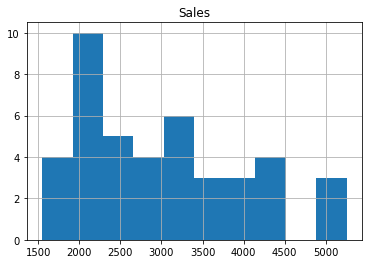

In [309]:
# Plotting histogram
plt.figure(figsize=(8,7))
Cocacola.hist()
plt.show()

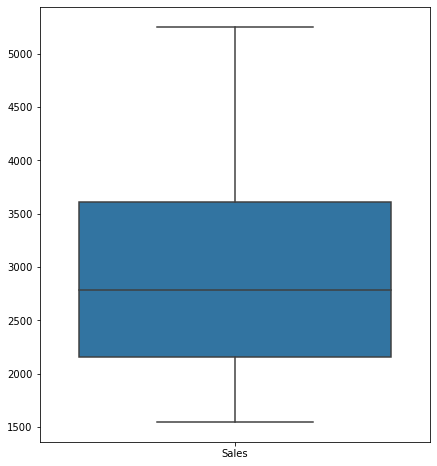

In [310]:
# Boxplot
plt.figure(figsize=(7,8))
sns.boxplot(data=Cocacola)
plt.show()

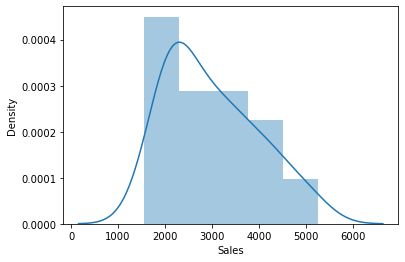

In [311]:
# Distplot
sns.distplot(Cocacola['Sales'],kde=True)
plt.show()

<AxesSubplot:xlabel='Quarter'>

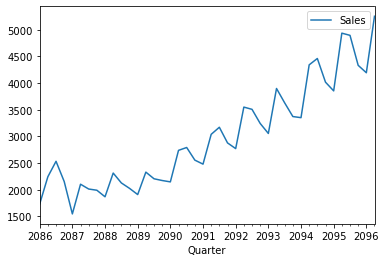

In [313]:
# Line plot
Cocacola.plot()

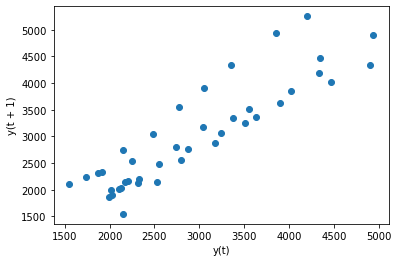

In [315]:
# Lag plot
from pandas.plotting import lag_plot
lag_plot(Cocacola['Sales'])
plt.show()

# Time series Analysis

## Time series Decomposition

In [316]:
from statsmodels.tsa.seasonal import seasonal_decompose

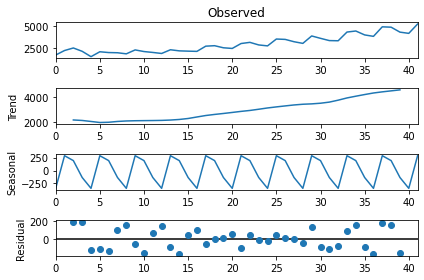

In [317]:
# Additive Seasonal Decomposition
# For quarterly data we take frequency = 4

ts_decomp= seasonal_decompose((Cocacola.values),model='additive',period = 4)

ts_plot = ts_decomp.plot()

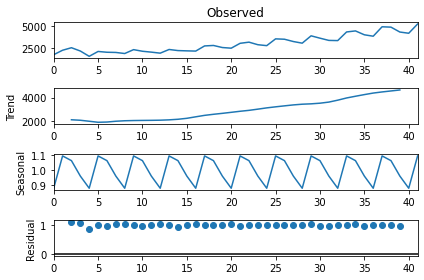

In [318]:
# Multiplicative Seasonal Decomposition
ts_decomp_mul= seasonal_decompose((Cocacola.values),model='multiplicative',period=4)

ts_plot_mul = ts_decomp_mul.plot()

In [319]:
len(Cocacola)

42

## Splitting training data and testing data

In [320]:
train=Cocacola.head(29)
test=Cocacola.tail(13)

In [321]:
print("Training data :",len(train))
print("Testing data :",len(test))


Training data : 29
Testing data : 13


In [322]:
train.head()

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996


In [323]:
test.head()

,Sales
Quarter,
2093-04-01,3899.0
2093-07-01,3629.0
2093-10-01,3373.0
2094-01-01,3352.0
2094-04-01,4342.0


# Forecasting methods

In [324]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from math import sqrt

##  1.Simple Moving Average

In [325]:
Cocacola_sma=Cocacola.copy()

In [326]:
# length of training data
train_len=29

In [186]:
# Function for rmse value
roll_val=[]
rmse_val=[]

for i in range(4,29,4):
    Cocacola_sma['sma_forecast'] = Cocacola_sma['Sales'].rolling(i).mean()
    Cocacola_sma['sma_forecast'][train_len:] = Cocacola_sma['sma_forecast'][train_len-1]
    rmse_sma = mean_squared_error(test['Sales'],Cocacola_sma['sma_forecast'][train_len:],squared=False).round(2)
    roll_val.append(i)
    rmse_val.append(rmse_sma)


In [187]:
d=pd.DataFrame({'Rolling window':roll_val,'rmse':rmse_val})
d

,Rolling window,rmse
0,4,1027.79
1,8,1187.93
2,12,1339.71
3,16,1515.59
4,20,1645.38
5,24,1748.46
6,28,1805.52


In [188]:
# Calculating rmse value for simple moving average
Cocacola_sma['sma_forecast'] = Cocacola_sma['Sales'].rolling(4).mean()
Cocacola_sma['sma_forecast'][train_len:] = Cocacola_sma['sma_forecast'][train_len-1]
sma_rmse = mean_squared_error(test['Sales'],Cocacola_sma['sma_forecast'][train_len:],squared=False).round(2)
print('Root mean square error for simple moving average model is :',sma_rmse)

Root mean square error for simple moving average model is : 1027.79


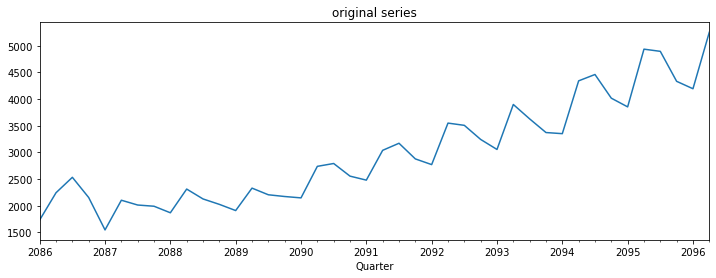

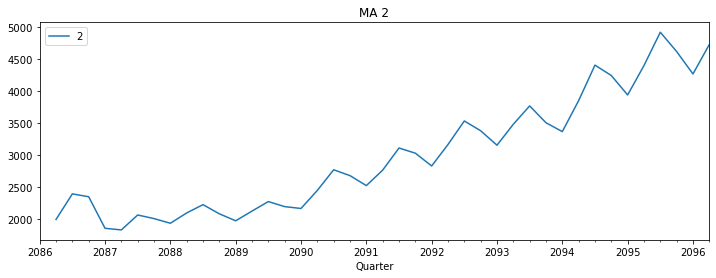

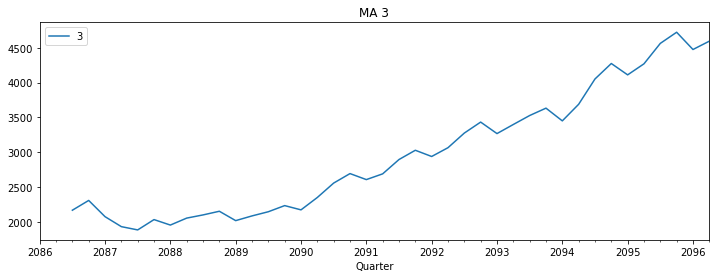

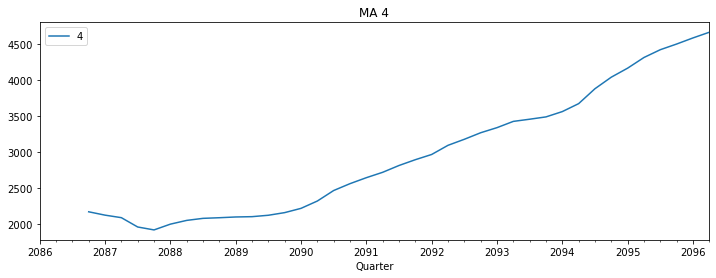

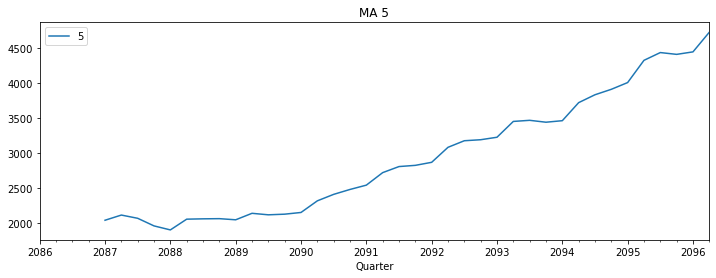

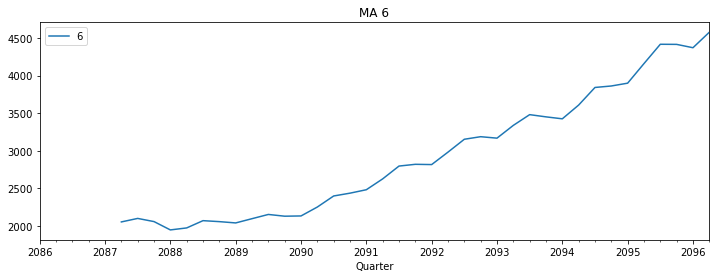

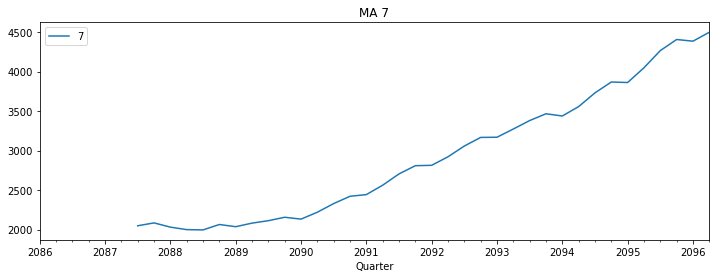

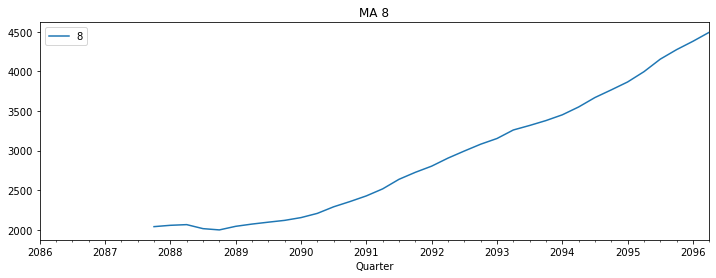

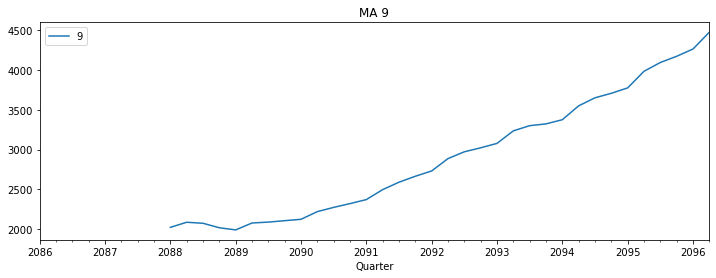

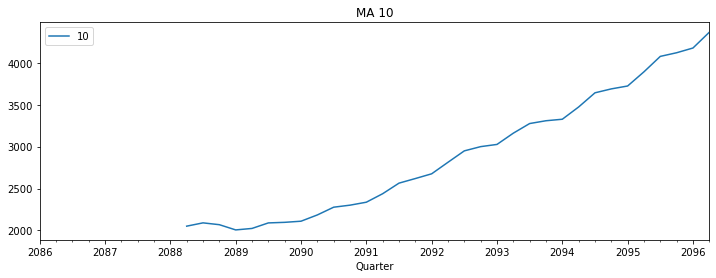

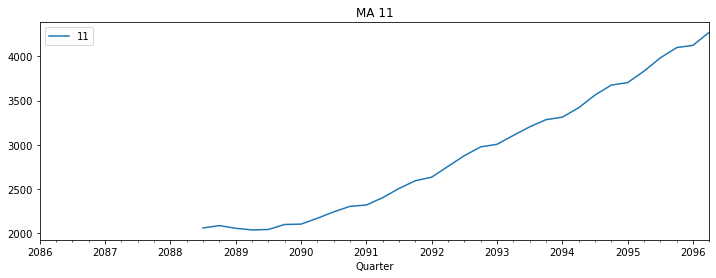

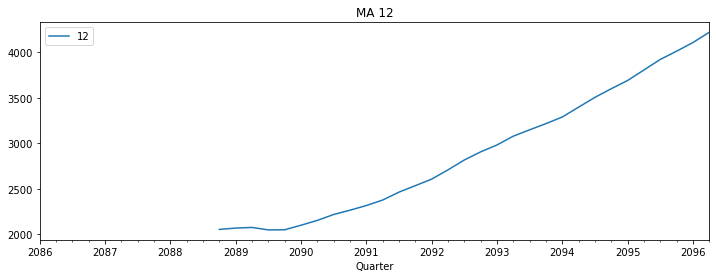

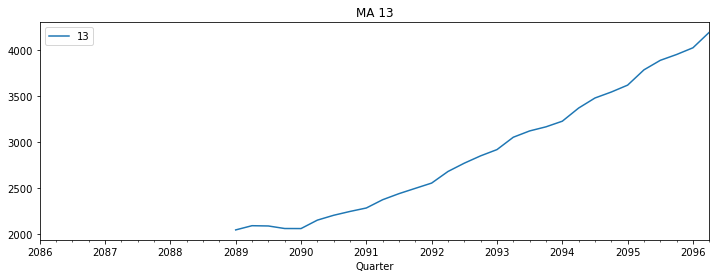

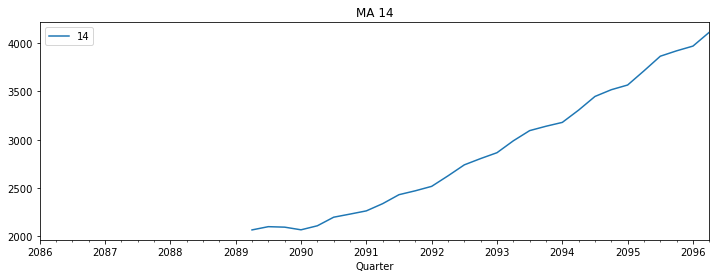

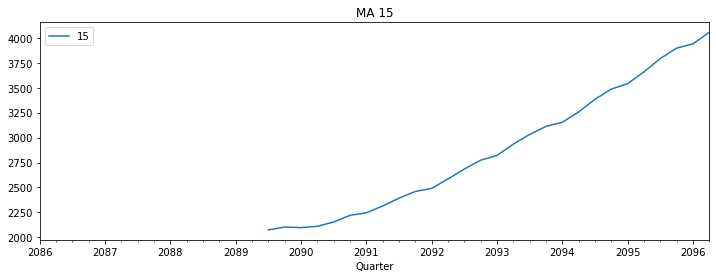

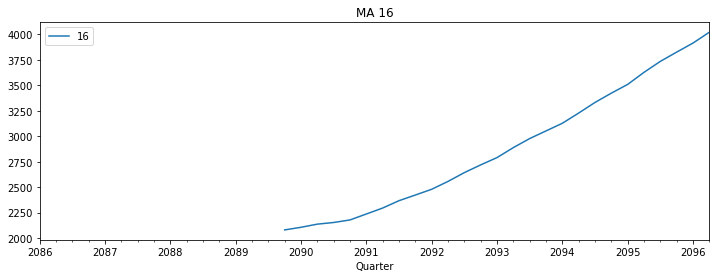

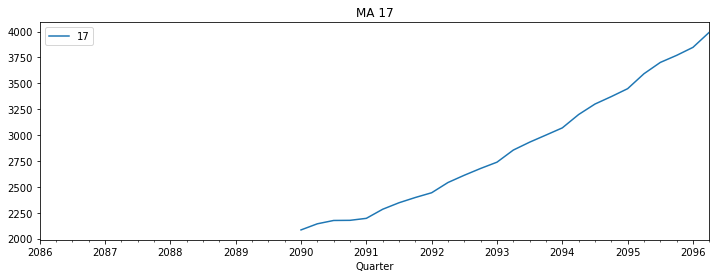

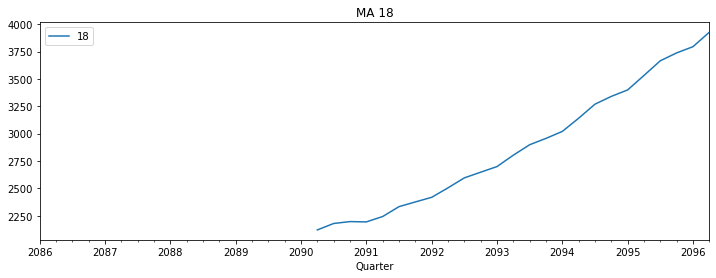

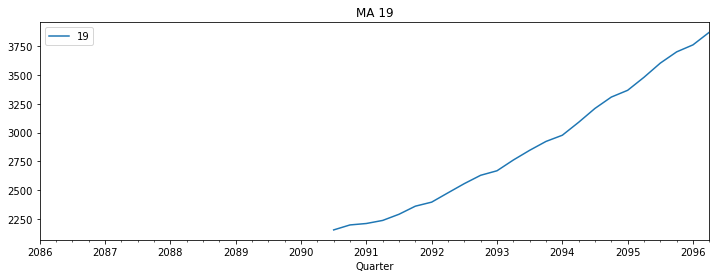

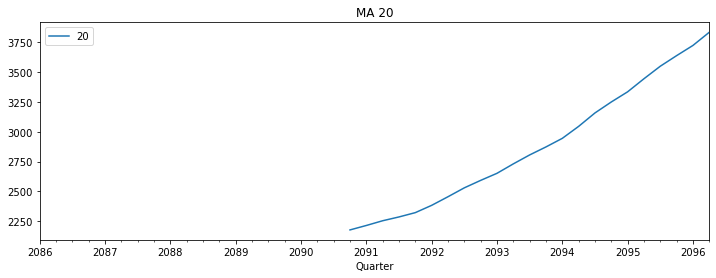

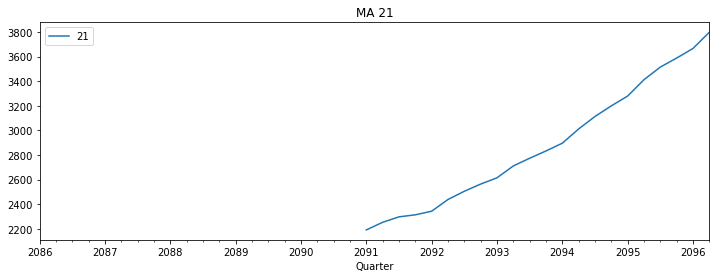

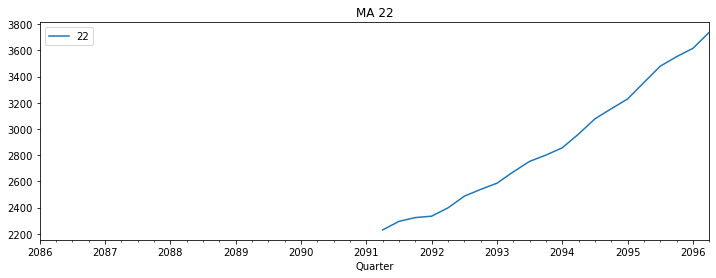

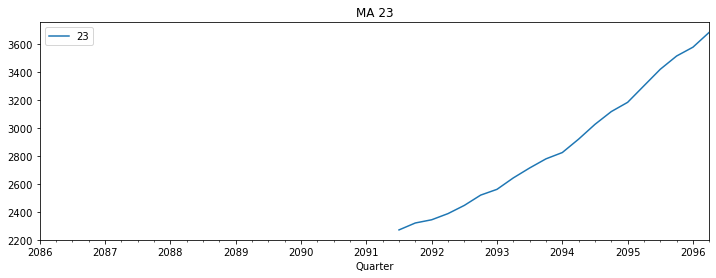

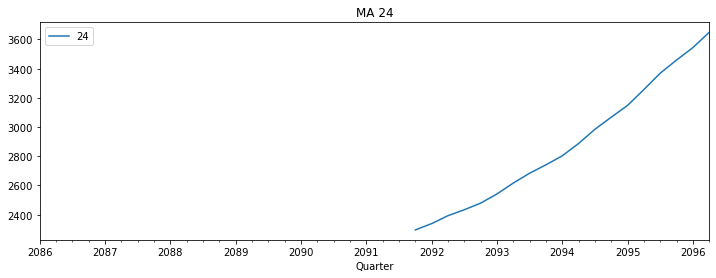

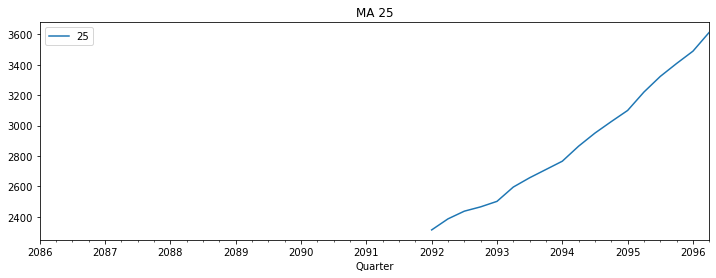

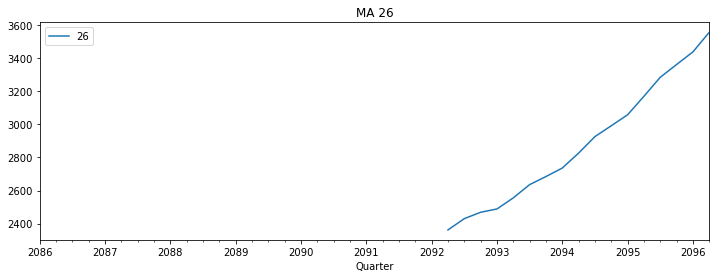

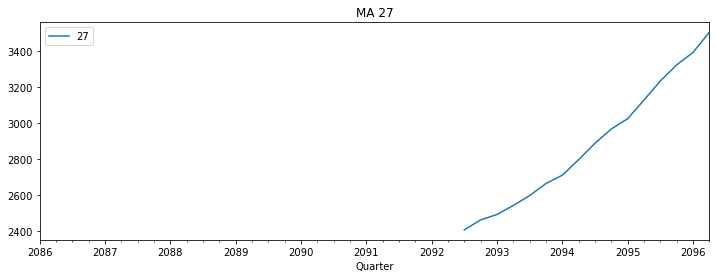

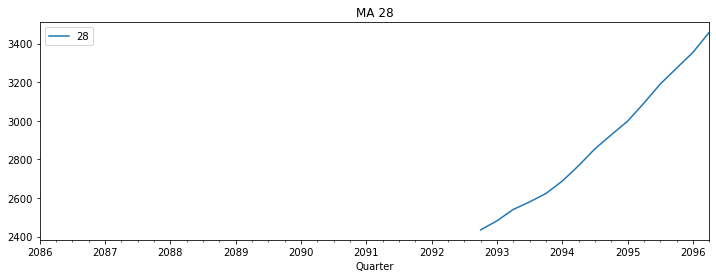

In [327]:
# Plotting line plot 
plt.figure(figsize=(12,4))
Cocacola['Sales'].plot(label="org")
plt.title("original series")

for i in range(2,29):
    plt.figure(figsize=(12,4))


    Cocacola['Sales'].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

## 2.Simple Exponential Smoothing

In [328]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [329]:
test.head()

,Sales
Quarter,
2093-04-01,3899.0
2093-07-01,3629.0
2093-10-01,3373.0
2094-01-01,3352.0
2094-04-01,4342.0


In [331]:
test.index

DatetimeIndex(['2093-04-01', '2093-07-01', '2093-10-01', '2094-01-01',
               '2094-04-01', '2094-07-01', '2094-10-01', '2095-01-01',
               '2095-04-01', '2095-07-01', '2095-10-01', '2096-01-01',
               '2096-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq='QS-OCT')

In [332]:
# fitting and predicting values for simple exponential smoothing model
SES_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.5)
pred_SES = SES_model.predict(start = test.index[0],end = test.index[-1])

In [333]:
# Calculating rmse for SES
SES_rmse = mean_squared_error(test['Sales'],pred_SES,squared=False).round(2)
print('Root mean square error for simple exponential smoothing model is :', SES_rmse)

Root mean square error for simple exponential smoothing model is : 1166.09


## 3. Arima Model

In [334]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [335]:
# Fitting and predicting data for arima mode
arima = ARIMA(train['Sales'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = test.index[0],end = test.index[-1])

In [336]:
# Calculating rmse for arima model
sales = np.array(test['Sales'])
arima_rmse = sqrt(mean_squared_error(sales,pred_arima))
print('Root Mean Square Error for Arima model is',arima_rmse)

Root Mean Square Error for Arima model is 1193.4148193140243


## 4. Holt's Method

In [337]:
from statsmodels.tsa.holtwinters import Holt

In [338]:
# fitting and predicting values for holt model
holt_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])

In [339]:
# Calculating rmse for holt method
holt_rmse = mean_squared_error(test['Sales'],pred_holt,squared=False).round(2)
print("Root mean square error for Holt method is :",holt_rmse)

Root mean square error for Holt method is : 1124.83


## 5. Holt's Exponential Method

## a. Additive method

In [340]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [341]:
# Fitting and predicting values for holt additive method
holt_add = ExponentialSmoothing(train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_holt_add = holt_add.predict(start = test.index[0],end = test.index[-1])

In [342]:
# Calculating rmse for holt additive method
holt_add_rmse = mean_squared_error(test['Sales'],pred_holt_add,squared=False).round(2)
print("Root mean square error for Holt's exponential additive method is :",holt_add_rmse)

Root mean square error for Holt's exponential additive method is : 525.07


## b. Multiplicative method

In [343]:
# Fitting and predicting values for holt multiplicative method
holt_mult = ExponentialSmoothing(train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_holt_mult = holt_mult.predict(start = test.index[0],end = test.index[-1])

In [344]:
#Calculating rmse for holt multiplicative method
holt_mult_rmse = mean_squared_error(test['Sales'],pred_holt_mult,squared=False).round(2)
print("Root mean square error for Holt's exponential multiplicative method is :", holt_mult_rmse )

Root mean square error for Holt's exponential multiplicative method is : 525.07


## DataFrame for all models

In [345]:
data = {"MODEL":pd.Series(["Simple moving average","simple exponential smoothing","Arima model","Holt's Method","Holt's Exponential Additive method","Holt's Exponential Multiplication method"]),"RMSE_Values":pd.Series([sma_rmse,SES_rmse,arima_rmse,holt_rmse,holt_add_rmse,holt_mult_rmse])}
rmse_table=pd.DataFrame(data)
rmse_table

,MODEL,RMSE_Values
0,Simple moving average,85.780000
1,simple exponential smoothing,1166.090000
2,Arima model,1193.414819
3,Holt's Method,1124.830000
4,Holt's Exponential Additive method,525.070000
5,Holt's Exponential Multiplication method,525.070000


In [346]:
rmse_table.sort_values(by='RMSE_Values')

,MODEL,RMSE_Values
0,Simple moving average,85.780000
4,Holt's Exponential Additive method,525.070000
5,Holt's Exponential Multiplication method,525.070000
3,Holt's Method,1124.830000
1,simple exponential smoothing,1166.090000
2,Arima model,1193.414819


From above model Holt's Exponential Additive method has minimum root mean square. So we can say that Holt's Exponential Additive method is best model.

# Problem Statement 2:

Forecast the Airlines Passengers data set. Prepare a document for each model explaining. How many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [369]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\Forecasting assignment

16-01-2023  23:09    <DIR>          .
16-01-2023  23:09    <DIR>          ..
15-01-2023  23:24    <DIR>          .ipynb_checkpoints
15-01-2023  00:58             9,559 Airlines+Data.xlsx
15-01-2023  00:58             9,422 CocaCola_Sales_Rawdata.xlsx
16-01-2023  23:09         1,634,649 Forecasting Assignment.ipynb
15-01-2023  00:58               233 Problem_statement.txt
               4 File(s)      1,653,863 bytes
               3 Dir(s)  127,407,050,752 bytes free


## Reading file

In [370]:
# Reading excel file
air = pd.read_excel('Airlines+Data.xlsx')
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# EDA

In [371]:
# Shape of dataset
air.shape

(96, 2)

In [372]:
# Describing data
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [373]:
# information of data
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [374]:
# counting values for passengers
air['Passengers'].value_counts()

229    3
118    2
306    2
235    2
135    2
      ..
218    1
230    1
209    1
191    1
271    1
Name: Passengers, Length: 80, dtype: int64

In [375]:
# Checking duplicate values
air.duplicated().sum()

0

# Visualization

<Figure size 1440x576 with 0 Axes>

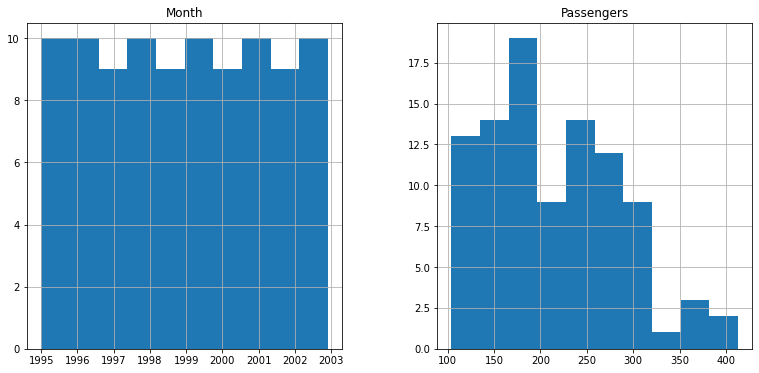

In [376]:
# plotting histogram
plt.figure(figsize=(20,8))
air.hist(figsize=(13,6))
plt.show()

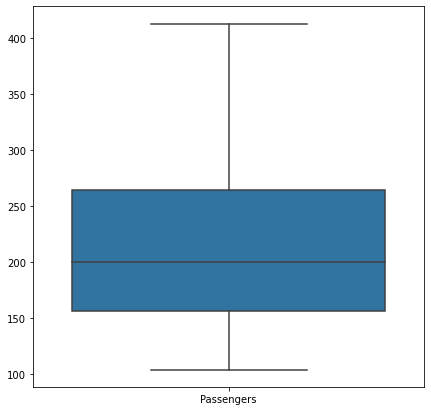

In [377]:
# Plotting boxplot
plt.figure(figsize=(7,7))
sns.boxplot(data=air,orient='v')
plt.show()

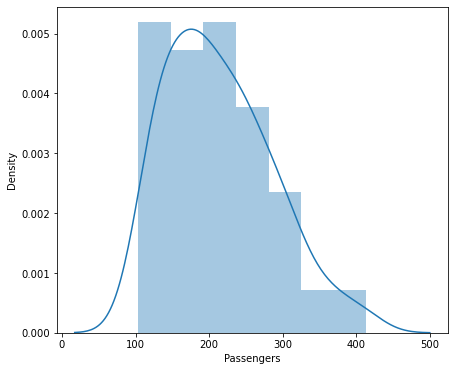

In [378]:
# plotting distplot
plt.figure(figsize=(7,6))
sns.distplot(air['Passengers'],kde=True)
plt.show()

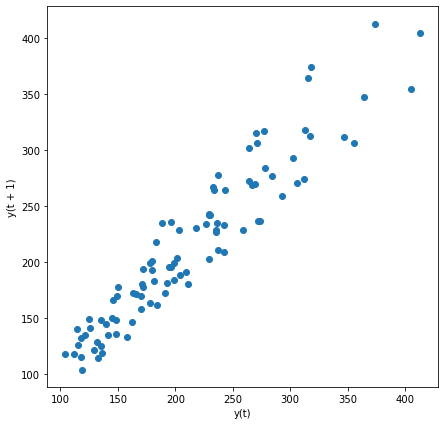

In [379]:
# plot lag plot
plt.figure(figsize=(7,7))
lag_plot(air['Passengers'])
plt.show()

<AxesSubplot:xlabel='Month'>

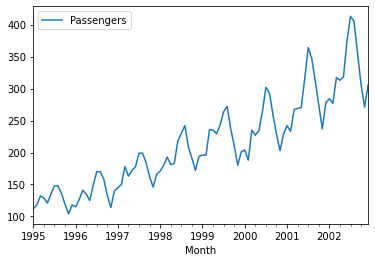

In [380]:
# Line plot
air.plot('Month')

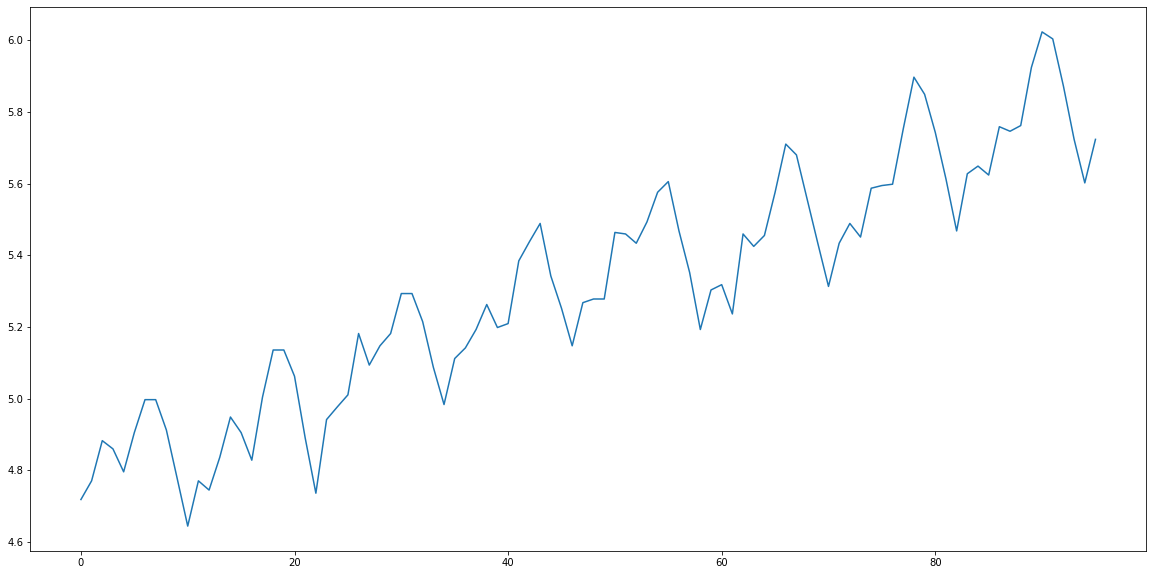

In [381]:
plt.figure(figsize=(20,10))
air_log=np.log(air['Passengers'])
plt.plot(air_log)

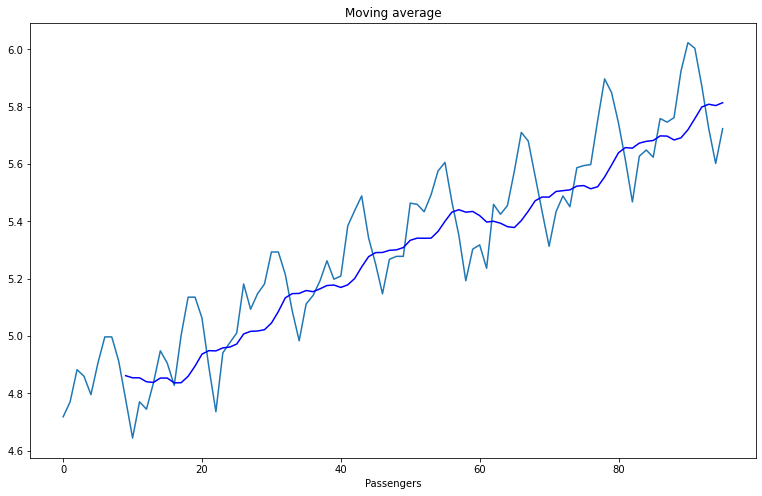

In [382]:
# Plotting moving avg
plt.figure(figsize=(13,8))
MAvg=air_log.rolling(window=10).mean()
MStd=air_log.rolling(window=10).std()
plt.plot(air_log)
plt.xlabel('Passengers')
plt.title('Moving average')
plt.plot(MAvg, color='blue')
plt.show()

# Time Series Analysis

## Time Series Decomposition

In [383]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [384]:
# Code for setting index
air= air.set_index('Month')
air.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [385]:
air.index.freq = 'MS' 

In [386]:
air.index.unique

<bound method Index.unique of DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '199

##   Additive Seasonal Decomposition

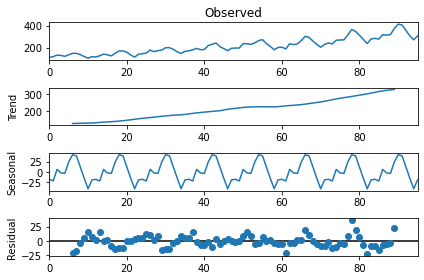

In [388]:
# for monthly data we take period as 12 and frequency as 4

as_decomp= seasonal_decompose((air.values),model='additive',period = 12)

as_plot = as_decomp.plot()

## Multiplicative Seasonal Decomposition

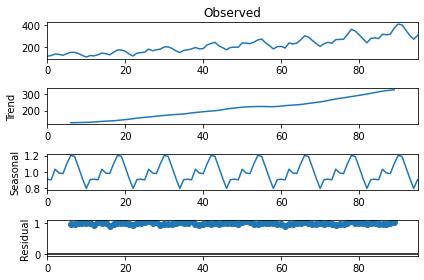

In [390]:
# for monthly data we take period as 12 and frequency as 4

as_decomp= seasonal_decompose((air.values),model='multiplicative',period = 12)

as_plot = as_decomp.plot()

## Splitting training and testing data

In [391]:
# splitting training and testing data into 66 and 30 resp.
air_train=air.iloc[0:66]
air_test=air.iloc[66:]

In [392]:
print("Length of train data is:",len(air_train))
print("Length of test data is:",len(air_test))


Length of train data is: 66
Length of test data is: 30


In [393]:
air_train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [394]:
air_test.head()

,Passengers
Month,
2000-07-01,302
2000-08-01,293
2000-09-01,259
2000-10-01,229
2000-11-01,203


# Forecasting Methods

## 1. Simple Moving Average

In [395]:
air_sma=air.copy()

In [396]:
train_len = 66

In [397]:
air_sma['sma_forecast'] = air_sma['Passengers'].rolling(12).mean()

In [398]:
air_sma['sma_forecast'][train_len:] = air_sma['sma_forecast'][train_len-1]

In [400]:
# Calculating rmse for SMA
sma_rmse = mean_squared_error(air_test['Passengers'],air_sma['sma_forecast'][train_len:],squared=False).round(2)
print("Root mean square error for Simple Moving Average is :", sma_rmse)

Root mean square error for Simple Moving Average is : 85.78


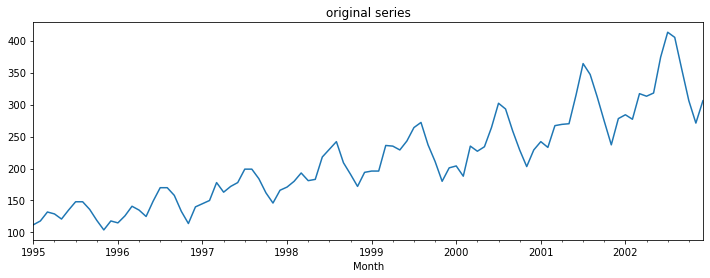

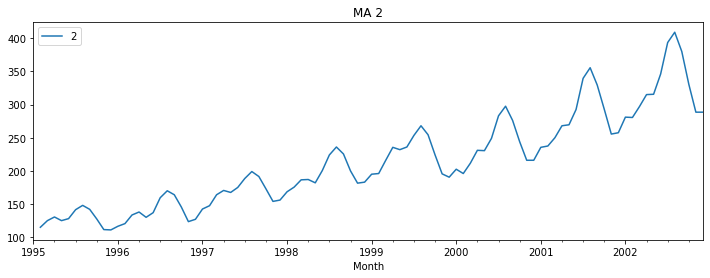

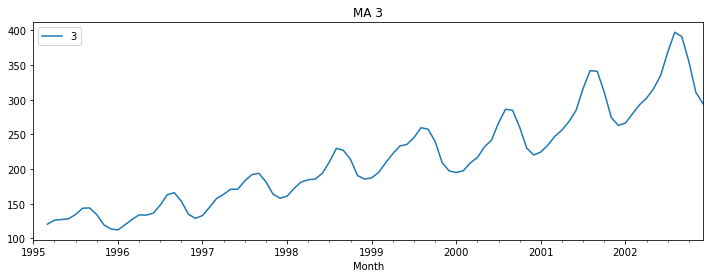

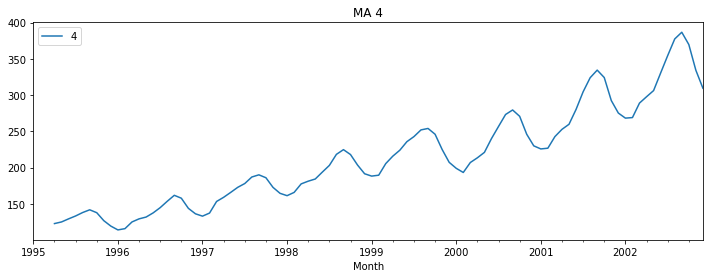

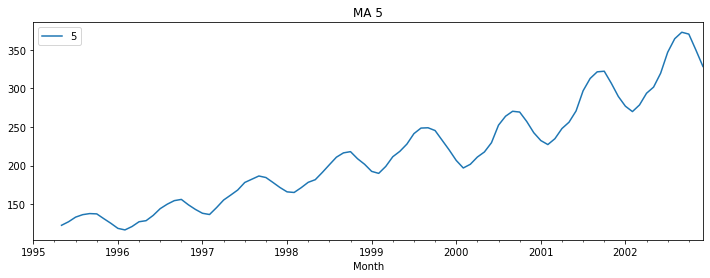

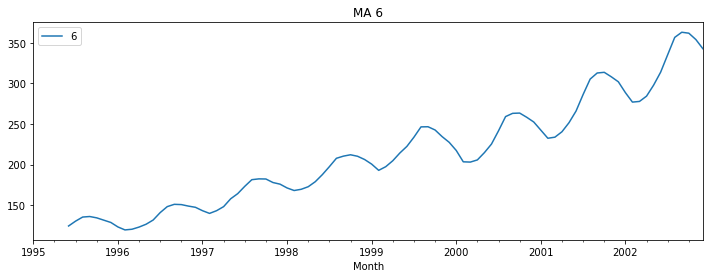

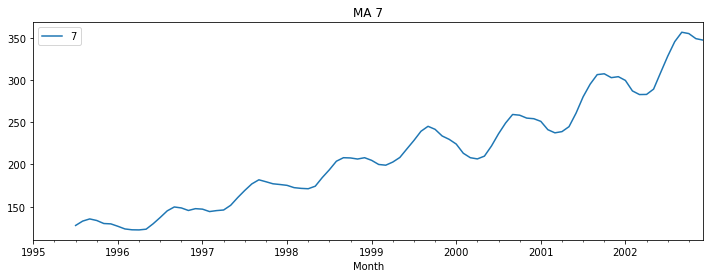

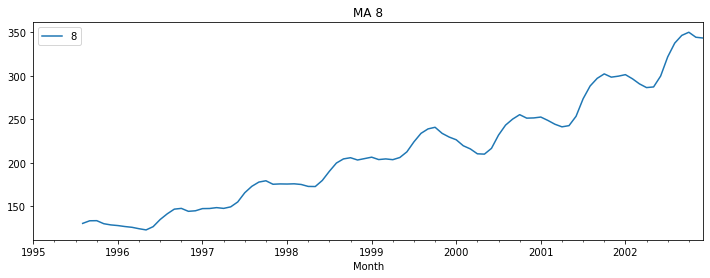

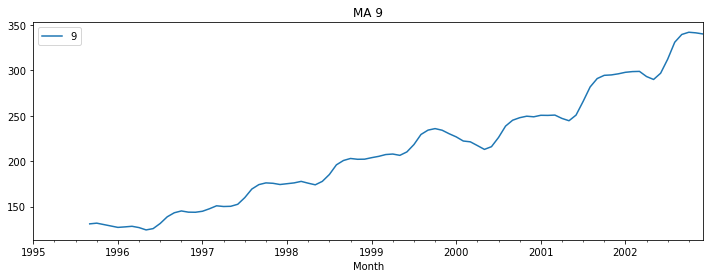

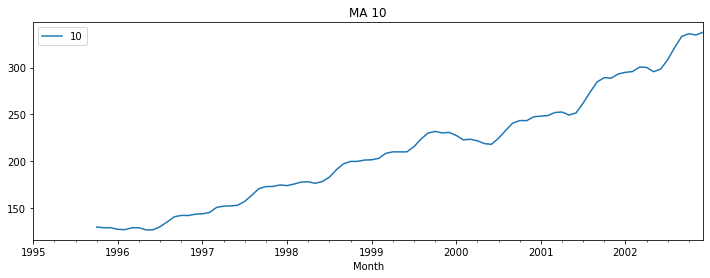

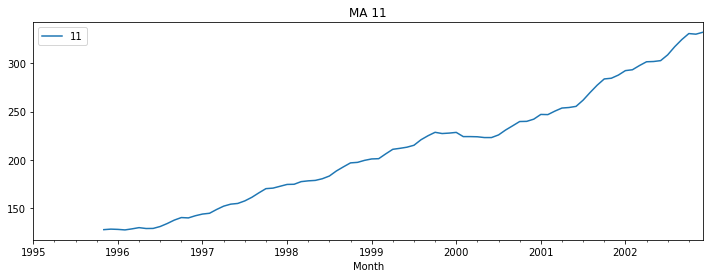

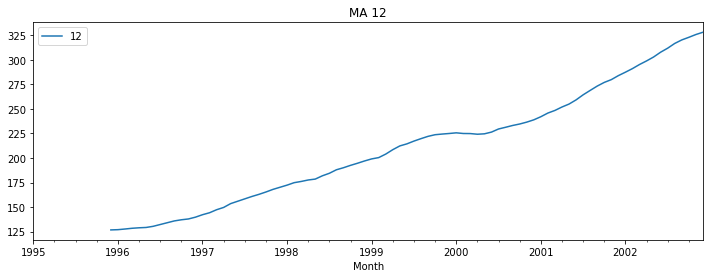

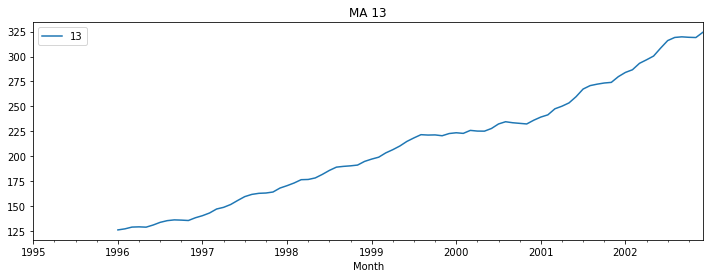

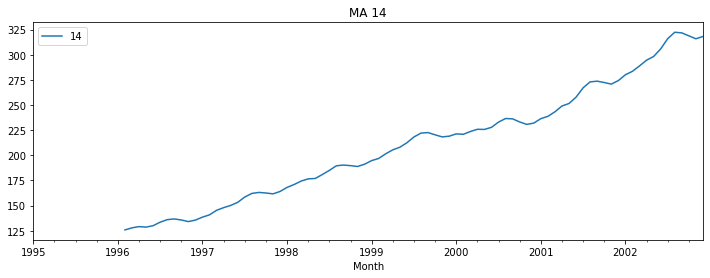

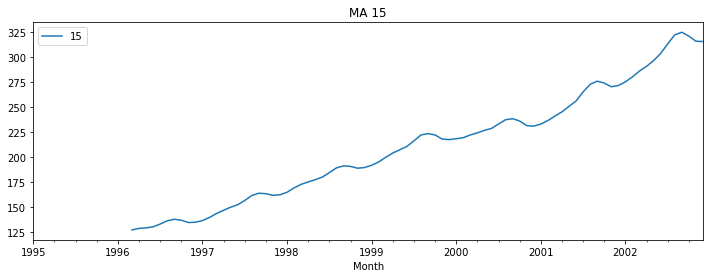

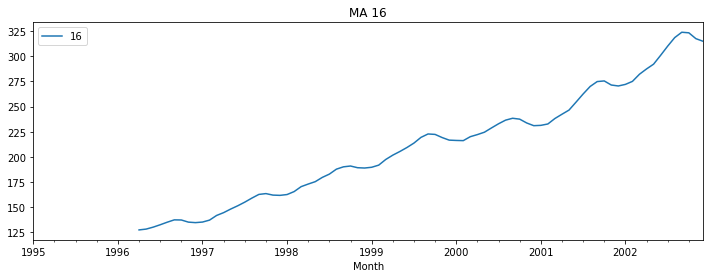

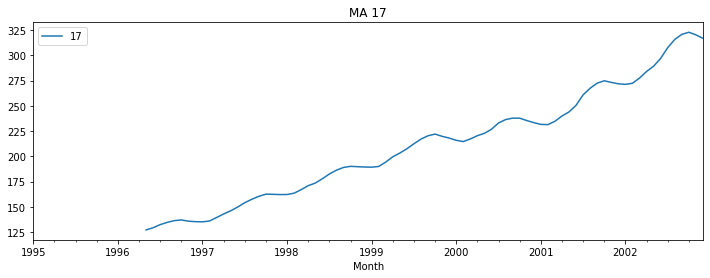

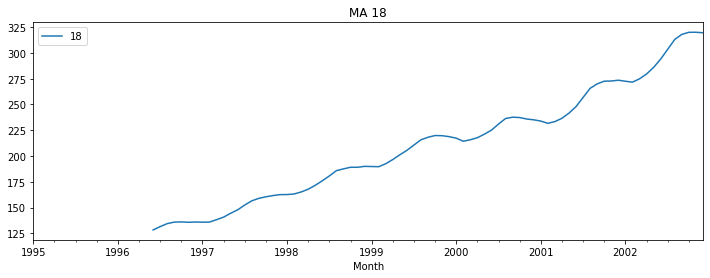

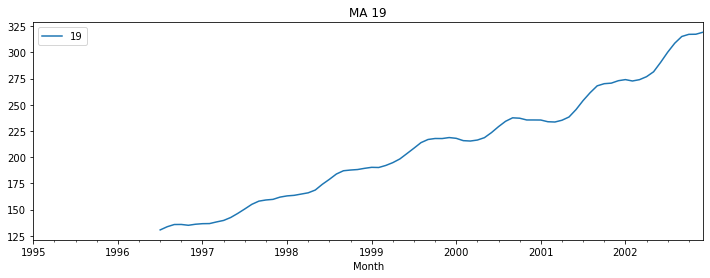

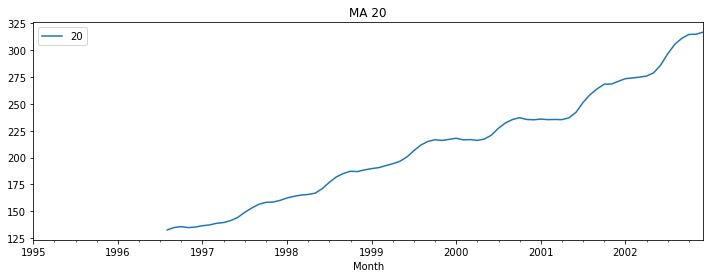

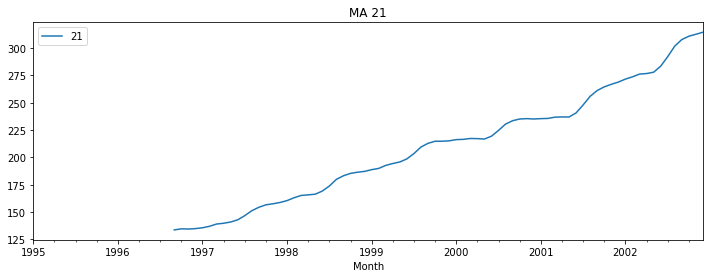

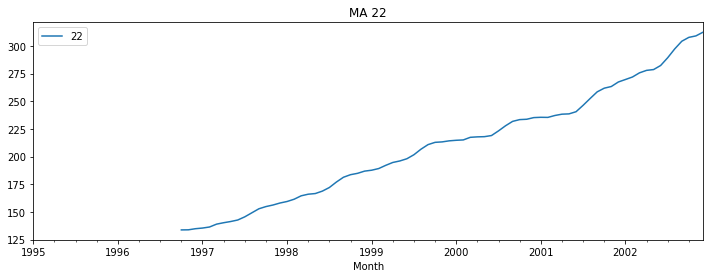

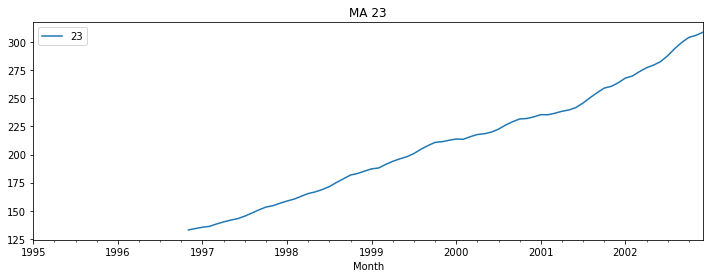

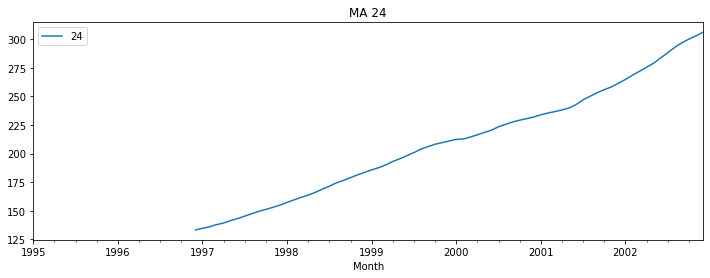

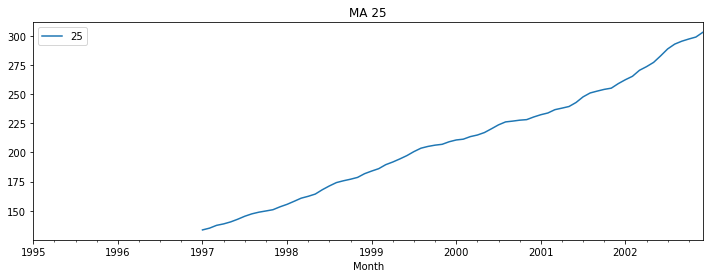

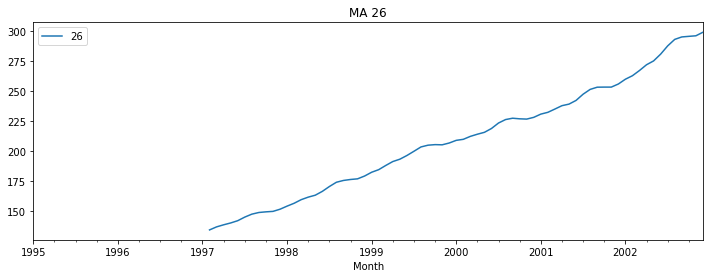

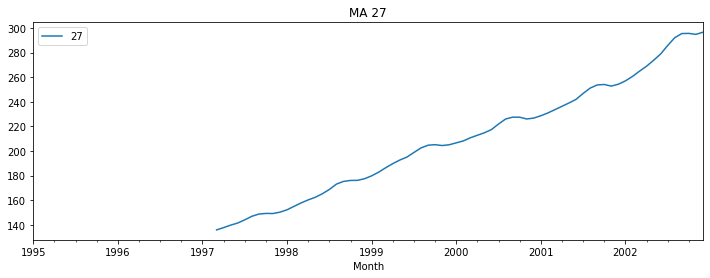

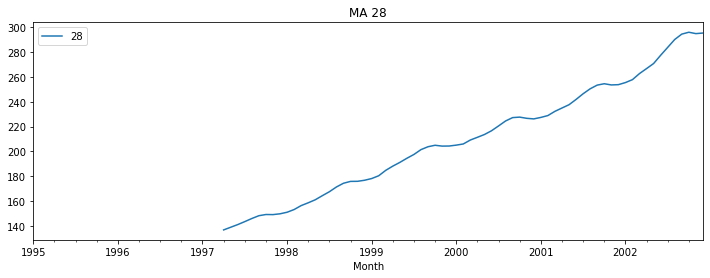

In [401]:
plt.figure(figsize=(12,4))
air['Passengers'].plot(label="org")
plt.title("original series")

for i in range(2,29):
    plt.figure(figsize=(12,4))


    air['Passengers'].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

## 2. Simple Exponential Smoothing

In [402]:
# Fitting and predicting data for Simple Exponential Smoothing model
ses_model = SimpleExpSmoothing(air_train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = air_test.index[0],end = air_test.index[-1])

In [404]:
# Calculating rmse for SES
ses_rmse = mean_squared_error(air_test['Passengers'],pred_ses,squared=False).round(2)
print("Root mean square error for Simple Exponential Smoothing method is:", ses_rmse)

Root mean square error for Simple Exponential Smoothing method is: 83.61


## 3. ARIMA Model

In [406]:
# Fitting and predicting data for ARIMA model
arima_model = ARIMA(air_train['Passengers'], order=(1,1,1)).fit()
pred_arima= arima_model.predict(start = air_test.index[0],end = air_test.index[-1])

In [407]:
# Calculating rmse for ARIMA model
Passengers = np.array(air_test['Passengers'])
arima_rmse = sqrt(mean_squared_error(Passengers,pred_arima))
print('Root Mean Square Error for Arima model is',arima_rmse)

Root Mean Square Error for Arima model is 59.82958097322504


## 4. Holt's Method

In [278]:
# Fitting and predicting data for Holt's model
holt_model = Holt(air_train["Passengers"]).fit(smoothing_level=0.7, smoothing_slope=0.3)
pred_holt = holt_model.predict(start = air_test.index[0],end = air_test.index[-1])

In [279]:
# Calculating rmse for Holt's model
holt_rmse = mean_squared_error(air_test['Passengers'],pred_holt,squared=False).round(2)
print("Root mean square error for Holt method is :",holt_rmse)

Root mean square error for Holt method is : 153.74


## 5. Holt's Exponential Method

##  a. Additive Method

In [408]:
# Fitting and predicting data for Holt's additive model
holt_add = ExponentialSmoothing(air_train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_holt_add = holt_add.predict(start = air_test.index[0],end = air_test.index[-1])

In [409]:
# Calculating rmse for Holt's Additive
holt_add_rmse = mean_squared_error(air_test['Passengers'],pred_holt_add,squared=False).round(2)
print("Root mean square error for Holt Exponential Additive method is :",holt_add_rmse)

Root mean square error for Holt Exponential Additive method is : 34.86


## b. Multiplicative Method

In [410]:
# Fitting and predicting data for Holt's multiplicative model
holt_mult = ExponentialSmoothing(air_train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_holt_mult = holt_mult.predict(start = air_test.index[0],end = air_test.index[-1])

In [411]:
# Calculating rmse for Holt's Multiplicative
holt_mult_rmse = mean_squared_error(air_test['Passengers'],pred_holt_mult,squared=False).round(2)
print("Root mean square error for Holt Exponential Additive method is :",holt_mult_rmse)

Root mean square error for Holt Exponential Additive method is : 34.86


## Dataframe for all RMSE

In [412]:
df={'MODEL':pd.Series(['simple_moving_average','simple_exponential smoothing','ARIMA Model','Holt','Holt Exponential additive method','Holt eponential multiplicative method']),"RMSE_Values":pd.Series([sma_rmse,SES_rmse,arima_rmse,holt_rmse,holt_add_rmse,holt_mult_rmse])}
df_table=pd.DataFrame(df)
df_table.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,Holt Exponential additive method,34.860000
5,Holt eponential multiplicative method,34.860000
2,ARIMA Model,59.829581
0,simple_moving_average,85.780000
3,Holt,1124.830000
1,simple_exponential smoothing,1166.090000


From above data we came to know that Holt's Exponential Additive Method has less Root Mean Square Error. So, Holt's Exponential Additive Method is best